# Projeto 3


**Estudantes:**

* Giulia Silva Fazzi - RA: 225270
* Muriel Guilherme Alves Mauch - RA: 225228

# Parte 1 - Modelo Evolucionário

## Introdução

Nesta primeira parte do trabalho, o objetivo do grupo foi resolver o problema do Pacman por meio da implementação de um modelo evolutivo. Para isso, nós escolhemos implementar **Algoritmo Genético**.

Como estudado durante a disciplina, aplicamos características de evolução e crossover para que, ao final da execução, fosse obtido um indíviduo capaz de oferecer uma solução ao problema.

Para tal, os seguintes componentes e características são parte essencial desse algoritmo:

1. *Fitness function*: para a função de fitness foi considerado o número de vitórias e o score do jogo, sendo esse último ponto o escolhido pela dupla, por obter melhor desempenho;
2. *Population size*: diversos valores foram testados e estudados, variando de 100 até 1000, porém optamos por utilizar uma população de tamanho 200 devido ao ambiente de execução;
3. *Stop criteria*: até atingir um número máximo de gerações ou o fim do jogo;
4. *Selection technique*: a técnica utilizada nesse projeto foi de seleção aleatória;
5. *Crossover technique*: para essa tarefa, foi empregado o *crossover* simples;
6. *Mutation technique* e *rate*: a mutação foi implementada a partir de uma escolha aleatória de indivíduos, a partir da escolha de um número aleatório de 0 a 10. Considerando igual probabilidade de escolha de números, a taxa de mutação é de cerca de 0.10;
7. *Replacement method*: a partir da abordagem descrita acima, nota-se que apenas alguns indíviduos são selecionados para a próxima geração, não ocorrendo a substituição total;
9. *Crossover rate*: o valor escolhido foi de 0.50. 


Por último, é importante ressaltar que buscamos deixar explícitos, conforme requisitado na especificação do trabalho, os *número de ações, fitness score* e o *score* por geração.

## Implementação: Algoritmo Genético

### Formulação do algoritmo

A construção de um agente baseado em algoritmo genético para a solução do problema em questão veio a partir da seguinte abordagem, característica a modelos do mesmo tipo:

1. criação de uma população inicial,
2. cálculo da função de fitness de cada indivíduo,
3. seleção de indivíduos e
4. mutação de indivíduos

### Detalhando o código

O código referente ao agente genético pode ser encontrado no arquivo *agents.py*. Nesta seção, será discutida as diferentes funções implementadas.

#### **agents.py**

##### Classe GeneticAgent

Na classe *GeneticAgent*, definimos todo o agente responsável por criação da população, mutação, *crossover* e, então, seleção de indivíduos.


O método *registerInitialState*, como o nome já sugere, faz a inicialização do estado inicial.

```
    def registerInitialState(self, state):
      self.actionList = [[ 0 for i in range(5) ] for j in range(8)]

      for i in range(0, 8):
        for y in range(0, 5):
          self.actionList[i][y] = Directions.STOP
          
      return
```

O método *fitness* é usado para calcular uma medida de desempenho relacionada a cada indivíduo, permitindo que seja avaliado o "quão bom" uma determinada solução está.

```
    def fitness(self, state, actions):
      state_aux = state
      fitness = []
      ranking = []

      run_alg = True

      for i in range(0, len(actions)):
        for j in range(0, len(actions[i])):
          if state_aux.isWin() == 0 and state_aux.isLose() :
            # create a successor
            state_aux = state_aux.generatePacmanSuccessor(actions[i][j])
          else:
            break

        if state_aux is None:
          run_alg = False
          break

        if state_aux != None:
          fitness.append((scoreEvaluation(state_aux)))

      # order
      fitness = sorted(fitness, key = int)
      size_fitness = len(fitness)
      number = (size_fitness * (size_fitness+1)) / 2
      
      for i in range(0, size_fitness):
        ranking.append(i + 1) # add to rank
    
      return fitness, actions, number, run_alg
```

O método *selection* recebe um número aleatório e, a partir dele, define um "parent" ao qual será associado aquele indíviduo. De modo mais explicativo: essa função será chamada duas vezes, havendo portanto dois indivíduos que darão origem a dois outros novos.

```
    def selection(self, number):
		  return number % 8
```

O método *crossover* recebe dois indivíduos e, a partir de uma escolha aleatória de números, determina como serão combinados/criados os dois novos indivíduos a partir deles.

```
    def crossover(self, actions, parent_1, parent_2):
      child_1 = []
      child_2 = []

      for i in range(0, 5):
        num = random.randint(0,50)
        
        if(num % 2):
          child_1.append(actions[parent_1][i])
          child_2.append(actions[parent_2][i])
        else:
          child_1.append(actions[parent_2][i])
          child_2.append(actions[parent_1][i])

      return child_1, child_2
```

Já o método *mutation* é responsável por atualizar, também de forma aleatória, alguns indivíduos pertencentes a uma determinada geração.

```
    def mutation(self, children, actions):
      size_children = len(children)
      size_actions = len(actions) - 1

      for i in range(0, size_children):
        for y in range(0, len(children[i])):
          num = random.randint(0,10)
          
          if(num <= 3):
            # mutate the child
            children[i][y] = actions[random.randint(0, size_actions)]

      return children
```

Por fim, o método *getAction* encarrega-se do funcionamento e junção de todos esses outros descritos acima. A partir de uma geração, acontecerá a seleção de determinados indivíduos e a criação de uma nova geração, fazendo-se uso do crossover.

```
    def getAction(self, state):
      run_alg = True
      ranking = []

      size_actions = len(self.actions)

      possible = state.getAllPossibleActions() 
      
      state_aux = state

      for i in range(0, size_actions):
        for j in range(0,len(self.actions[i])):
          # keep running
          if state_aux.isWin() == 0 and state_aux.isLose() == 0:
            state_aux =state_aux.generatePacmanSuccessor(self.actions[i][j])
          else:
            break

      while(run_alg):
        fitness, actions, number, run_alg = self.getFitness(self.actions,state)

        if not run_alg:
          size_actions = len(actions)
          children = []

          for i in range(0, size_actions, 2):
            # select parents 
            parent1 = self.selection(random.randint(0,number))
            parent2 = self.selection(random.randint(0,number))

            # crossover
            child_1, child_2 = self.getCrossover(actions,parent1,parent2)

            # save children
            children.append(child_1)
            children.append(child_2)
          
          # mutation
          children = self.mutationn(children,possible)

          # actions
          self.actions = children[:]
        else:
          self.actions = actions [:]

      return self.actions[7][0]
```

## Execução e Resultados Obtidos

A execução do algoritmo não pôde ser finalizada devido ao longo tempo de execução do mesmo. Durante os testes, o grupo averiguou ainda que o algoritmo não convergia. Com isso, a visualização dos resultados obtidos fica prejudicada.

# Parte 2 - Reinforcement Learning

## Introdução

Nesta segunda parte do trabalho 3, o objetivo do grupo foi resolver o problema do Pacman por meio da implementação de um algoritmo de Aprendizado por reforço. Para tal tarefa, nós escolhemos implementar o algoritmo **QLearn**.

Como visto em aula, levamos em consideração algumas informações relevantes a natureza da solução, como por exemplo:

* a cada passo t, o agente:
    * executa uma ação $A_{t}$,
    * recebe uma observação $O_{t}$ e,
    * recebe uma recompensa $R_{t}$
    
Além do que, foi preciso definir nosso *Markov Decision Process (MDP)*, no qual o futuro é independente do passado, desde que dadas as informações do presente. Essa representação possui implicações importantíssimas, uma vez que nos ajuda na *complexidade computacional* e na *performance resultante*. 

Levamos em consideração também os componentes necessários de um agente de Aprendizado por Reforço, tais como:

1. *Policy*: que representa o comportamento do agente;
2. *Value function*: o quão bom é cada ação ou estado;
3. Modelo: representação do ambiente pelo agente.

Por último, é importante ressaltar que buscamos deixar explícitos, conforme requisitado na especificação do trabalho, as *recompensas, número de ações e score* por episódio.

Destacamos também, que os passos para a configuração do ambiente estão explicitados no arquivo **README.md** mas serão adicionados aqui para a melhor compreensão dos corretores. Além disso, todos os códigos implementados por nós estão contidos nos arquivos **unused_agentes.py**, **agents.py** e **featureExtractor.py**, sendo que o primeiro foi utilizado como exercício para entendimento da base de código e não é relevante para este projeto. Já os dois últimos serão colocados aqui para a explicação da solução criada.  

## Setup do ambiente e como executar o código

Para que pudessemos realizar a implementação foi necessário configurarmos nosso ambiente, portanto realizamos os seguintes passos:

1. instalamos o python2,
2. garantimos a instalação do tkinter,
2. criamos um ambiente virtual (venv) e instalamos o matplotlib,
3. executamos o código.

Vamos explicitar os comandos abaixo.

Para a criação do ambiente virtual, utilizamos o commando:

` virtualenv --python=/usr/bin/python2.7 venv `

Em seguida, ativamos a venv:

` source venv/bin/activate `

Instalamos o tkinter:

` sudo apt-get install python-tk `

E o matplotlib:

` pip install matplotlib `

E rodamos os algoritmos:

` python2 pacman.py -p ApproximateQAgent -a extractor=FeatureExtractor -x 100 -n 110 -l smallClassic `

` python2 pacman.py -p ApproximateQAgent -a extractor=FeatureExtractor -x 100 -n 110 -l mediumClassic `

` python2 pacman.py -p ApproximateQAgent -a extractor=FeatureExtractor -x 100 -n 110 -l originalClassic `

## Implementação: QLearn

### Formulação da MDP

O primeiro passo, como já dito, foi a definição de nossa MDP com seus respectivos estados, ações e função de recompensa. Dessa forma, buscamos definir as funções para:

1. conhecer os estados, 
2. definir o estado inicial,
3. conhecer as ações,
4. definir as transições e
5. a função de recompensa.

Ao analisarmos o código, percebemos que muitas dessas informações nos foram disponibilizadas pelo código base, e portanto as utilizamos em nosso favor, sendo assim:

* os passos 1, 3 e 4 nos foram fornecidos pelo arquivo *pacman.py* por meio da classe *GameState*;
* a definição do estado inicial foi feito por nós, no arquivo *agents.py*, na classe *ReinforcementAgent*;
* a função recompensa foi definida por nós aproveitando o código fornecido, ou seja, utilizamos o próprio *score* como recompensa ao nosso agente.

Dos componentes de um agente de Aprendizado por reforço, definimos:

1. *policy*: pegamos as ações legais disponíveis, calculamos o *QValue* para cada uma e selecionamos o que nos fornece o melhor valor;
2. *value function*: extraímos as características do ambiente no estado atual, como por exemplo as comidas disponíveis, a localização do pacman e dos fantasmas, assim como as paredes. Para cada uma das informações calculamos seu *QValue* e reajustamos os pesos;
3. Modelo: o *QLearn* é *model-free*, portanto, não foi preciso nos preocuparmos.

### Modelo de discretização, número de episódios de treino, critério de parada e demais parâmetros

1. Não utilizamos um modelo de discretização;
2. Foram 10000 episódios de treino;
3. os critérios de parada foram: acabaram as "comidas" ou o pacman morreu;
4. learning rate igual a 0.2, desconto de 0.8 e fator de exploração de 0.05.

Relembramos mais uma vez que, para cada episódio, calculamos a recompensa (que foi o *score*) e o número de ações tomadas.

### Detalhando o código

Como mencionamos, os códigos relevantes estão contidos nos arquivos *agents.py* e *featureExtractor.py*. Nesta seção, vamos discutir cada pedaço da implementação. Lembramos que, por costume de implementação os códigos foram desenvolvidos e comentados em inglês e manteremos esta estrutura aqui, mas faremos comentários adicionais em português, para manter o padrão do relatório. 

Por facilidade de implementação, decidimos por uma estrutura multi-agente e implementamos no arquivo *agents.py* as seguintes classes: *ReinforcementAgent, QLearningAgent e ApproximateQAgent*. Já no arquivo *featureExtractors.py*, implementamos a classe de mesmo nome. Vamos mergulhar em cada uma delas agora.

#### **agents.py**

##### Classe ReinforcementAgent

Na classe *ReinforcementAgent*, definimos o agente que estima os *QValues* assim como as políticas por meio da experiência adquirida. Nela, definimos a maioria dos atributos principais. Esta classe recebe em seu construtor uma lista de ações disponíveis fornecida pelo *pacman.py*, assim como o número de episódios de treinamento e os parâmetros de aprendizagem *epsilon* (taxa de exploração), *alpha* (taxa de aprendizagem) e *gamma* (desconto). Todos eles possuem valores padrão, mas que são substituídos durante a execução. Além disso, no construtor são definidas outros atributos importantes, como o número de episódios ocorridos, o último estado e a última ação, assim como os *scores* acumulados de treino, teste e por episódio.

```
class ReinforcementAgent(Agent):
    """
    The Reinforcement Agent estimates Q-Values (as well as policies) from experience
    """

    def __init__(self, actions_available=None, num_training=10, epsilon=0.5, alpha=0.5, gamma=1):
        """
        Instantiates the Reinforcement Agent
        
        Keyword Arguments:
            actions_available: function that takes a state and return the legal actions
            alpha: learning rate
            epsilon: exploration rate
            gamma: discount factor
            num_training: number of training episodes
        """
        if actions_available is None:
            actions_available = lambda state: state.getLegalActions()

        self.episodes_so_far = 0

        self.number_of_actions_taken = 0
        self.actions_available = actions_available

        self.num_training = int(num_training)
        self.epsilon = float(epsilon)  # exploration rate
        self.alpha = float(alpha)  # learning rate
        self.discount = float(gamma)  # discount factor

        self.last_state = None
        self.last_action = None

        self.accum_train_score = 0.0
        self.accum_test_score = 0.0
        self.episode_score = 0.0
```

O método *update* é implementado pelas classes filhas. Já o método *getLegalActions* apenas retorna uma lista com as ações disponíveis para um dado estado.

```
    def update(self, state, action, next_state, reward):
        pass  # not implemented here

    def getLegalActions(self, state):
        # Get the actions available for a given state
        return self.actions_available(state)
```

O método *observeTransition* é chamado para informar o agente que uma transição foi observada, ou seja, foi tomada uma ação e necessitamos atualizar os atributos de acordo.

```
    def observeTransition(self, state, action, next_state, delta_reward):
        """
            Called to inform the agent that a transition has been observed.
            We will call self.update with the same arguments
        """
        self.episode_score += delta_reward
        self.update(state, action, next_state, delta_reward)
```

O método *startEpisode* é auto-explicativo. Ele inicia o episódio garantindo o que os atributos essênciais sejam inicializados corretamente.

```
    def startEpisode(self):
        self.last_state = None
        self.last_action = None
        self.episode_score = 0.0
        self.number_of_actions_taken = 0
```

E o método *stopEpisode* é o responsável por finalizar o episódio. Nele, calculamos o *score/reward* e o número de ações. Além disso atualizamos o *score* total. Caso seja o último episódio de treinamento, definimos a taxa de aprendizado e de exploração como 0. 

```
    def stopEpisode(self):
        print("Ending episode: {}".format(self.episodes_so_far + 1))
        print('Score: {}'.format(self.episode_score))
        message = 'Number of actions taken: {}'.format(self.number_of_actions_taken)
        print(message)
        print("-" * len(message))

        if self.episodes_so_far < self.num_training:
            self.accum_train_score += self.episode_score
        else:
            self.accum_test_score += self.episode_score
        self.episodes_so_far += 1
        if self.episodes_so_far >= self.num_training:
            # now we remove the parameters
            self.epsilon = 0.0
            self.alpha = 0.0
```

O método *doAction* atualiza o contador de ações e define a ação e estados tomados.

```
    def doAction(self, state, action):
        self.number_of_actions_taken += 1
        self.last_state = state
        self.last_action = action
```

Já o método *observationFunction*, atualiza a recompensa assim que a ação mais recente é tomada, e chama o método *ObserveFunction* para atualizar os atributos do agente.

```
    def observationFunction(self, state):
        # Called right after the last action
        if not self.last_state is None:
            reward = state.getScore() - self.last_state.getScore()
            self.observeTransition(self.last_state, self.last_action, state, reward)
        return state
```

Por fim, os métodos *registerInitialState* e *final* também são auto-explicativos. O primeiro chama o método *startEpisode* e o segundo finaliza o jogo, sendo que este último é chamado quando uma das condições de parada são atingidas.

```
    def registerInitialState(self, state):
        self.startEpisode()
        if self.episodes_so_far == 0:
            message = "Beginning {} episodes of Training".format(self.num_training)
            print('-' * len(message))
            print(message)
            print('-' * len(message))

    def final(self, state):
        # finishes the game
        delta_reward = state.getScore() - self.last_state.getScore()
        self.observeTransition(self.last_state, self.last_action, state, delta_reward)
        self.stopEpisode()

        if self.episodes_so_far == self.num_training:
            msg = 'Finished training'
            print("{}\n{}".format(msg, '-' * len(msg)))
```

##### Classe QLearningAgent

Logo em seguida, implementamos a classe *QLearningAgent*, a qual herda da classe *ReinforcementAgent*. Nela, implementamos os métodos do nosso algoritmo de aprendizado. Em seu construtor apenas instanciamos a classe mãe e printamos os atributos.

```
class QLearningAgent(ReinforcementAgent):
    """
      This is the Q-Learning Agent
    """

    def __init__(self, **args):
        ReinforcementAgent.__init__(self, **args)

        self.q_values = util.Counter()
        print("alpha/learning rate: {}".format(self.alpha))
        print("gamma/discount: {}".format(self.discount))
        print("epsilon/exploration: {}".format(self.epsilon))
```

Em seu método *getQValue*, retornamos a tupla com o estado e ação.

```
    def getQValue(self, state, action):
        """
          Returns Q(state,action)
          Should return 0.0 if we never seen a state or (state,action) tuple
        """
        return self.q_values[(state, action)]
```

No método *getValue*, para cada combinação de ação válida para o estado disponível, calculamos o *QValue*, supra-citado.

```
    def getValue(self, state):
        """
          Returns max_action Q(state,action) where the max is over legal actions. 
          Return 0.0 if final state
        """
        possible_state_q_values = util.Counter()
        for action in self.getLegalActions(state):
            possible_state_q_values[action] = self.getQValue(state, action)

        return possible_state_q_values[possible_state_q_values.argMax()]
```

Já o método *getPolicy* é um dos mais importantes de nossa solução. Nele, dado um estado calculamos a melhor ação a ser tomada. Caso seja a primeira execução, a ação será escolhida aleatoriamente,

```
    def getPolicy(self, state):
        """
          Compute the best action to take in a state.  
          Returns none if final state
        """
        possible_state_q_values = util.Counter()
        possible_actions = self.getLegalActions(state)
        if len(possible_actions) == 0:
            return None

        for action in possible_actions:
            possible_state_q_values[action] = self.getQValue(state, action)

        if possible_state_q_values.totalCount() == 0:
            return random.choice(possible_actions)
        else:
            return possible_state_q_values.argMax()
```

O método *getAction* é utilizado para selecionar a melhor ação a ser tomada. Caso o cálculo dos pesos nos forneca uma taxa de exploração muito alta, uma ação é selecionada aleatoriamente, caso contrário, a melhor ação é selecionada por meio da chamada do método *getPolicy*.

```
    def getAction(self, state):
        """
          Compute the action to take in the current state.  
          With probability self.epsilon >> take a random action 
          otherwise >> take the best policy action 
          None if terminal state
        """
        legal_actions = self.getLegalActions(state)
        action = None
        if len(legal_actions) > 0:
            if util.flipCoin(self.epsilon):
                action = random.choice(legal_actions)
            else:
                action = self.getPolicy(state)

        return action
```

Por último, definimos o método *update*, o qual é chamado pela classe mãe para observar a tomada de uma ação em um dado estado. Nele, identificamos o próximo estado e calculamos a recompensa. A recompensa é calculada conforme vimos em aula, dada a função: 

\begin{equation}
Q(S_t,A_t) = Q(S_t,A_t) + alpha(R_t+1 + epsilon*Q(S_t+1,A') - Q(S_t,A_t))
\end{equation}

Onde o *epsilon* é definido pela recompensa somada ao fator de desconto.

```
    def update(self, state, action, next_state, reward):
        """
          The parent class calls this to observe a state = action => nextState and reward transition.
          Here is where we update our Q-Value
        """
        print("State: {}. Action: {}. NextState: {}. Reward: {}".format(state, action, next_state, reward))
        print("QVALUE: {}".format(self.getQValue(state, action)))
        print("VALUE: {}".format(self.getValue(next_state)))
        self.q_values[(state, action)] = self.getQValue(state, action) + self.alpha * (
                reward + self.discount * self.getValue(next_state) - self.getQValue(state, action))
```

##### Classe ApproximateQAgent

Por fim, implementamos a classe *ApproximateQAgent*, a qual herda da classe *QLearningAgent*. Nessa, instanciamos nosso extrator de características e atualizamos os pesos para cada iteração. 

```
class ApproximateQAgent(QLearningAgent):
    """
       ApproximateQLearningAgent
    """

    def __init__(self, extractor='FeatureExtractor', epsilon=0.05, gamma=0.8, alpha=0.2, num_training=0, **args):
        self.featExtractor = FeatureExtractor()

        args['epsilon'] = epsilon
        args['gamma'] = gamma
        args['alpha'] = alpha
        args['num_training'] = num_training
        self.index = 0  # Pacman initial position
        QLearningAgent.__init__(self, **args)
        self.weights = util.Counter()
```

Instanciamos nela o método *getQValue*, o qual utiliza as características do ambiente e utiliza os valores das *features* com os pesos atualizados.

```
    def getQValue(self, state, action):
        # return Q(state,action) = w * featureVector
        q_value = 0.0
        features = self.featExtractor.getFeatures(state, action)
        for key in features.keys():
            q_value += (self.weights[key] * features[key])
        return q_value
```

O método *getAction* utiliza os métodos da classe mãe, a *QLearnAgent*, para tomar uma ação e atualizar os parâmetros.

```
    def getAction(self, state):
        """
        Simply calls the getAction method of QLearningAgent and then
        informs parent of action for Pacman.  Do not change or remove this
        method.
        """
        action = QLearningAgent.getAction(self, state)
        self.doAction(state, action)
        return action
```

Já o método *update* atualiza os pesos para cada transição, atualizando também o valor de Q. Nele utilizamos também a expressão mencionada no bloco acima, com algumas alterações, para reajuste dos pesos de cada uma das *features*.

```
    def update(self, state, action, next_state, reward):
        # Should update your weights based on transition
        # we get the features based on the current state and action, ignoring the past
        # this allows us to have a huge performance advantage
        features = self.featExtractor.getFeatures(state, action)
        possible_state_q_values = []

        for act in self.getLegalActions(state):
            possible_state_q_values.append(self.getQValue(state, act))
        for key in features.keys():
            self.weights[key] += self.alpha * (reward + self.discount * (
                    (1 - self.epsilon) * self.getValue(next_state) + (self.epsilon / len(possible_state_q_values)) * (
                sum(possible_state_q_values))) - self.getQValue(state, action)) * features[key]

```

Por fim, o método *final* apenas finaliza o game, chamando o método da classe mãe.

```
    def final(self, state):
        # called to end the game
        QLearningAgent.final(self, state)
```

#### featureExtractors.py

A classe *featureExtractor* retorna as informações do ambiente para o agente. Como por exemplo, as comidas disponíveis, a posição do pacman e dos fantasmas, a posição das paredes, etc. Vamos explorar o código.

**Relembramos que todas as características são independentes do passado e levam em consideração o estado atual apenas**

O construtor é vazio e o primeiro método, chamado *is_food_close*, recebe uma posição futura do pacman, uma lista de "comidas", que é uma lista de posições, e a posição das paredes. Neste método, são identificadas as posições das comidas disponíveis, assim como as posições já visitadas. Enquanto houver comida disponível no ambiente, verificamos se a posição foi visitada, caso não tenha sido, atualizamos essa informação. Em seguida, se houver comida na posição mais próximas, a retornamos. Se não, procuramos nas posições adjacentes, utilizando as funções já disponibilizadas pelo game, como a *Actions.getLegalNeighbors*. Caso não haja mais comida, retornamos *None*.

```
    def is_food_close(self, pacman_future_location, food, walls):
        food_available = [(pacman_future_location[0], pacman_future_location[1], 0)]
        visited = set()

        while food_available:
            pacman_future_location_x, pacman_future_location_y, dist = food_available.pop(0)
            if (pacman_future_location_x, pacman_future_location_y) in visited:
                continue
            visited.add((pacman_future_location_x, pacman_future_location_y))
            # return if we find food at this position
            if food[pacman_future_location_x][pacman_future_location_y]:
                return dist
            # if not, we will search the neighbours positions
            nbrs = Actions.getLegalNeighbors((pacman_future_location_x, pacman_future_location_y), walls)
            for nbr_x, nbr_y in nbrs:
                food_available.append((nbr_x, nbr_y, dist + 1))
        # return None if no more food is found
        return None
```

A função *map_manhattan_distances* é utilizada para retornar a distância do pacman para os fantasmas, utilizando o método disponibilizado em *util.manhattanDistance*.

```
    def map_manhattan_distances(self, pacman_position, ghosts):
        return map(lambda g: util.manhattanDistance(pacman_position, g.getPosition()), ghosts)
```

E por fim, o método *getFeatures* é utilizado, como vimos, pelo agente *ApproximateQAgent*. Ele fornece ao agente as informações de onde estão as comidas, as paredes, a posição do pacman e dos fantasmas.

```
    def getFeatures(self, state, action):
        """
            extract the following information:
                grid of food
                wall locations and
                get the ghost locations
        """
        available_food = state.getFood()
        walls_positions = state.getWalls()
        ghosts_positions = state.getGhostPositions()

        capsules_left = len(state.getCapsules())
        scared_ghost = []
        active_ghost = []

        features = util.Counter()

        for ghost in state.getGhostStates():
            if not ghost.scaredTimer:
                active_ghost.append(ghost)
            else:
                scared_ghost.append(ghost)

        pacman_location = state.getPacmanPosition()

        features["bias"] = 1.0

        # compute the location of pacman after he takes the action
        x, y = state.getPacmanPosition()
        dx, dy = Actions.directionToVector(action)
        next_x, next_y = int(x + dx), int(y + dy)

        # count the number of ghosts 1-step away
        features["#-of-ghosts-1-step-away"] = sum(
            (next_x, next_y) in Actions.getLegalNeighbors(ghost, walls_positions) for ghost in ghosts_positions)

        # if there is no danger of ghosts then add the food feature
        if not features["#-of-ghosts-1-step-away"] and available_food[next_x][next_y]:
            features["eats-food"] = 1.0

        dist = self.is_food_close((next_x, next_y), available_food, walls_positions)
        if dist is not None:
            features["closest-food"] = float(dist) / (walls_positions.width * walls_positions.height)

        if scared_ghost:
            distance_to_closest_scared_ghost = min(self.map_manhattan_distances(pacman_location, scared_ghost))
            if active_ghost:
                distance_to_closest_active_ghost = min(self.map_manhattan_distances(pacman_location, active_ghost))
            else:
                distance_to_closest_active_ghost = 10

            features["capsules"] = capsules_left

            if distance_to_closest_scared_ghost <= 8 and distance_to_closest_active_ghost >= 2:
                features["#-of-ghosts-1-step-away"] = 0
                features["eats-food"] = 0.0

        features.divideAll(10.0)
        return features
```

## Execução e Resultados Obtidos

Como mencionado, treinamos nosso pacman por 10000 episódios, utilizando uma taxa de aprendizagem de 0.2, uma taxa de exploração de 0.05 e desconto de 0.8. Os comando para a execução do código são os seguintes:

`python2 pacman.py -p ApproximateQAgent -a extractor=FeatureExtractor -x 10000 -n 10010 -l smallClassic`

`python2 pacman.py -p ApproximateQAgent -a extractor=FeatureExtractor -x 10000 -n 10010 -l mediumClassic`

`python2 pacman.py -p ApproximateQAgent -a extractor=FeatureExtractor -x 10000 -n 10010 -l originalClassic`

### Resultados para o Small Layout

Para o jogo usando o layout smallClassic, vemos que nosso agente apresenta o seguinte comportamento no treinamento:

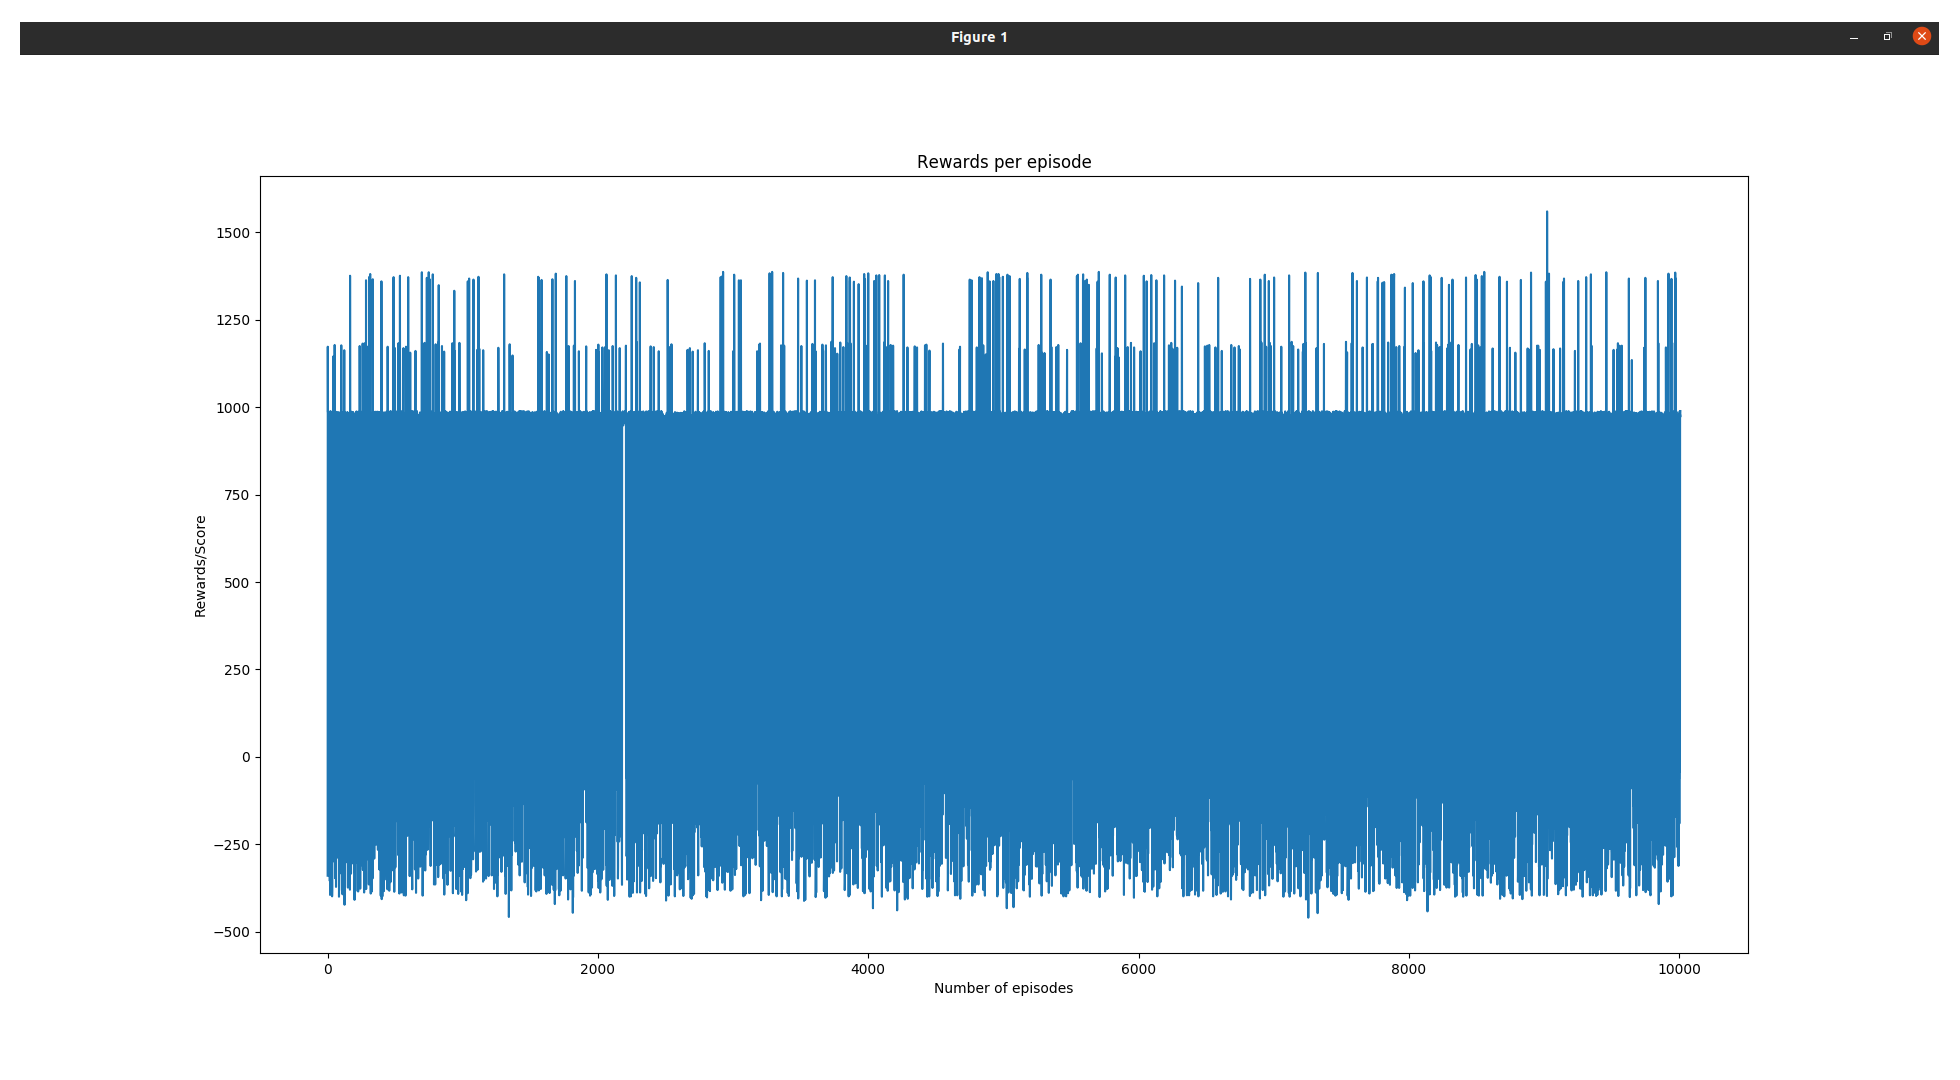

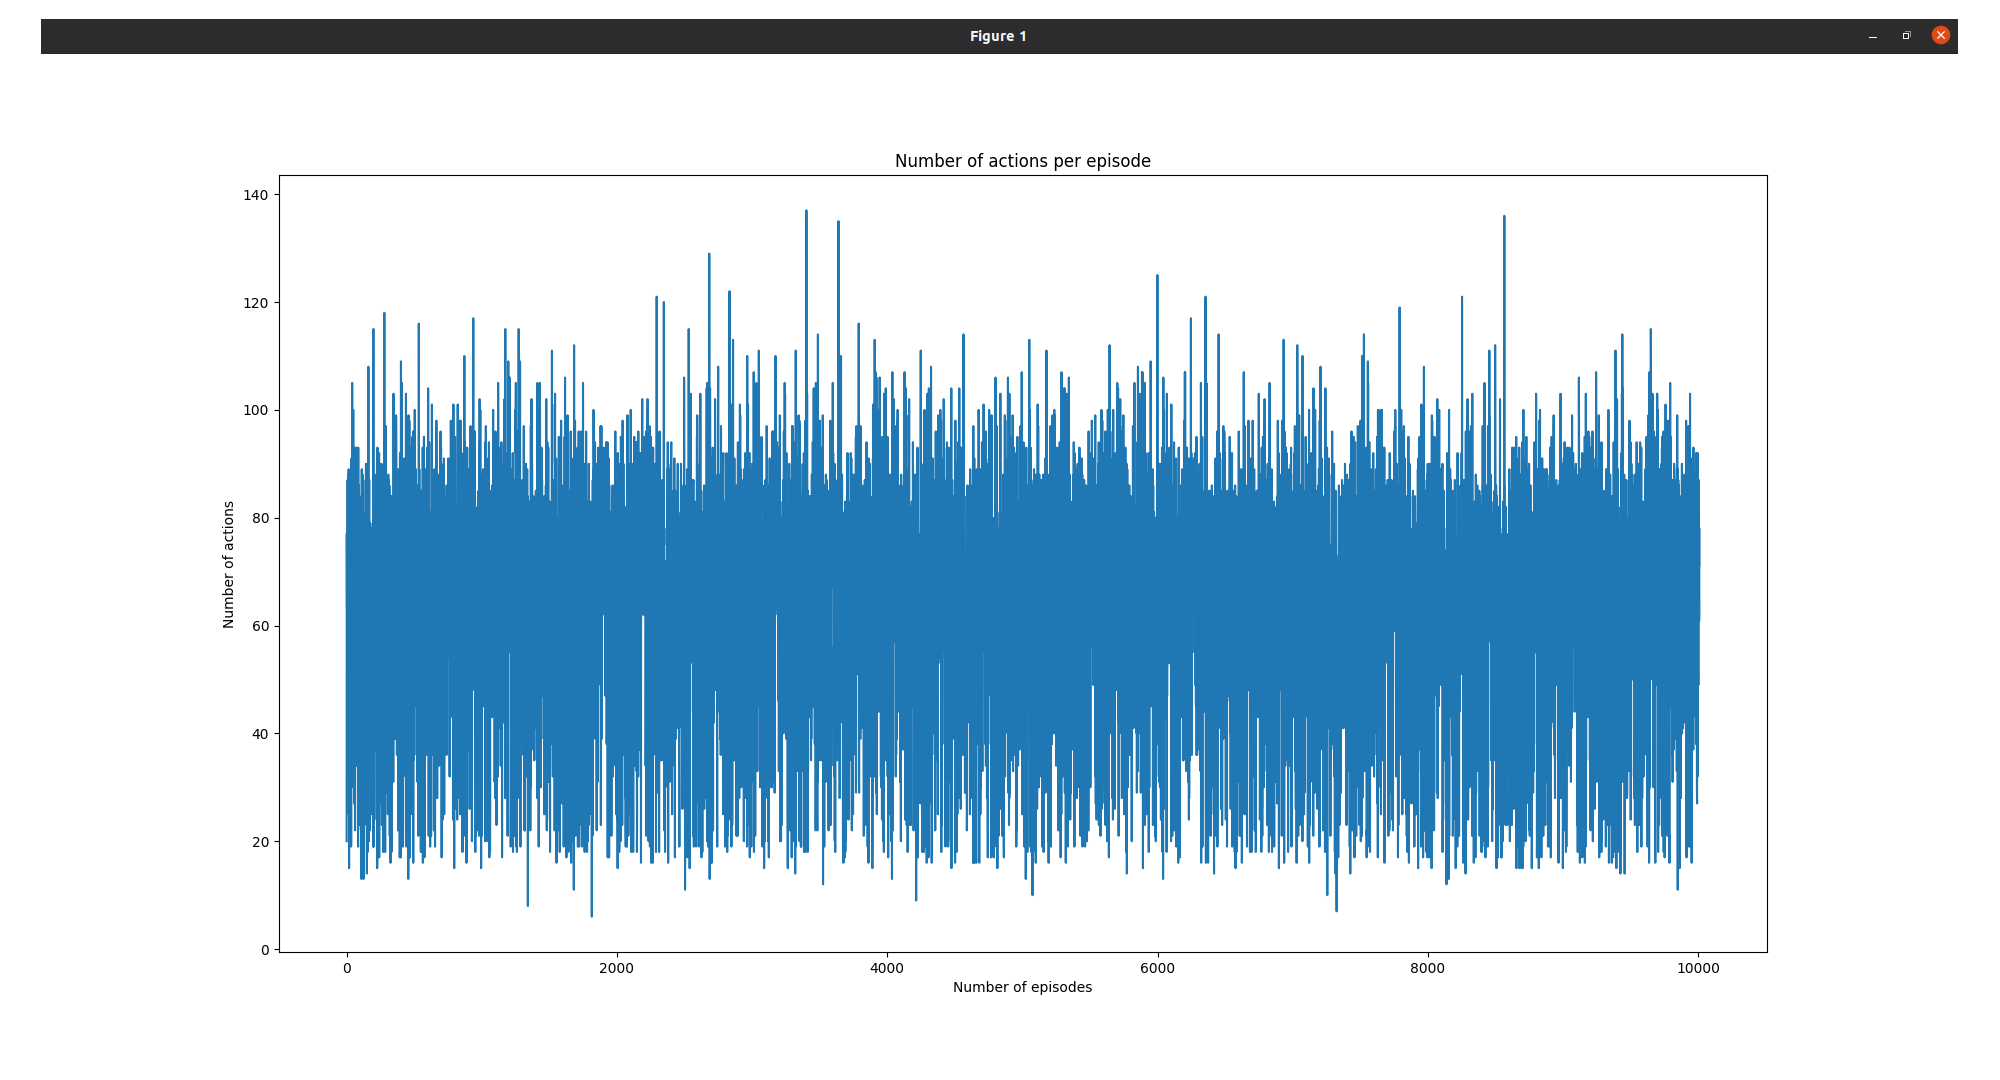

E no conjunto de teste, obtivemos os seguintes resultados:

| Partida | Score | Nro de Ações | Resultado | 
|---------|-------|--------------|-----------|
|    1    | -191  |      51      |   Loss    |
|    2    | -189  |      49      |   Loss    |
|    3    |  985  |      65      |    Win    |
|    4    |  988  |      62      |    Win    |
|    5    |  963  |      87      |    Win    |
|    6    |  -43  |      83      |   Loss    |
|    7    |  979  |      71      |    Win    |
|    8    |  972  |      78      |    Win    |
|    9    |  989  |      61      |    Win    |
|   10    |  980  |      60      |    Win    |


Average Score: 643.3

Win Rate:      7/10 (0.70)

### Resultados para o Medium Classic

Para o jogo usando o layout mediumClassic, vemos que nosso agente apresenta o seguinte comportamento no treinamento:

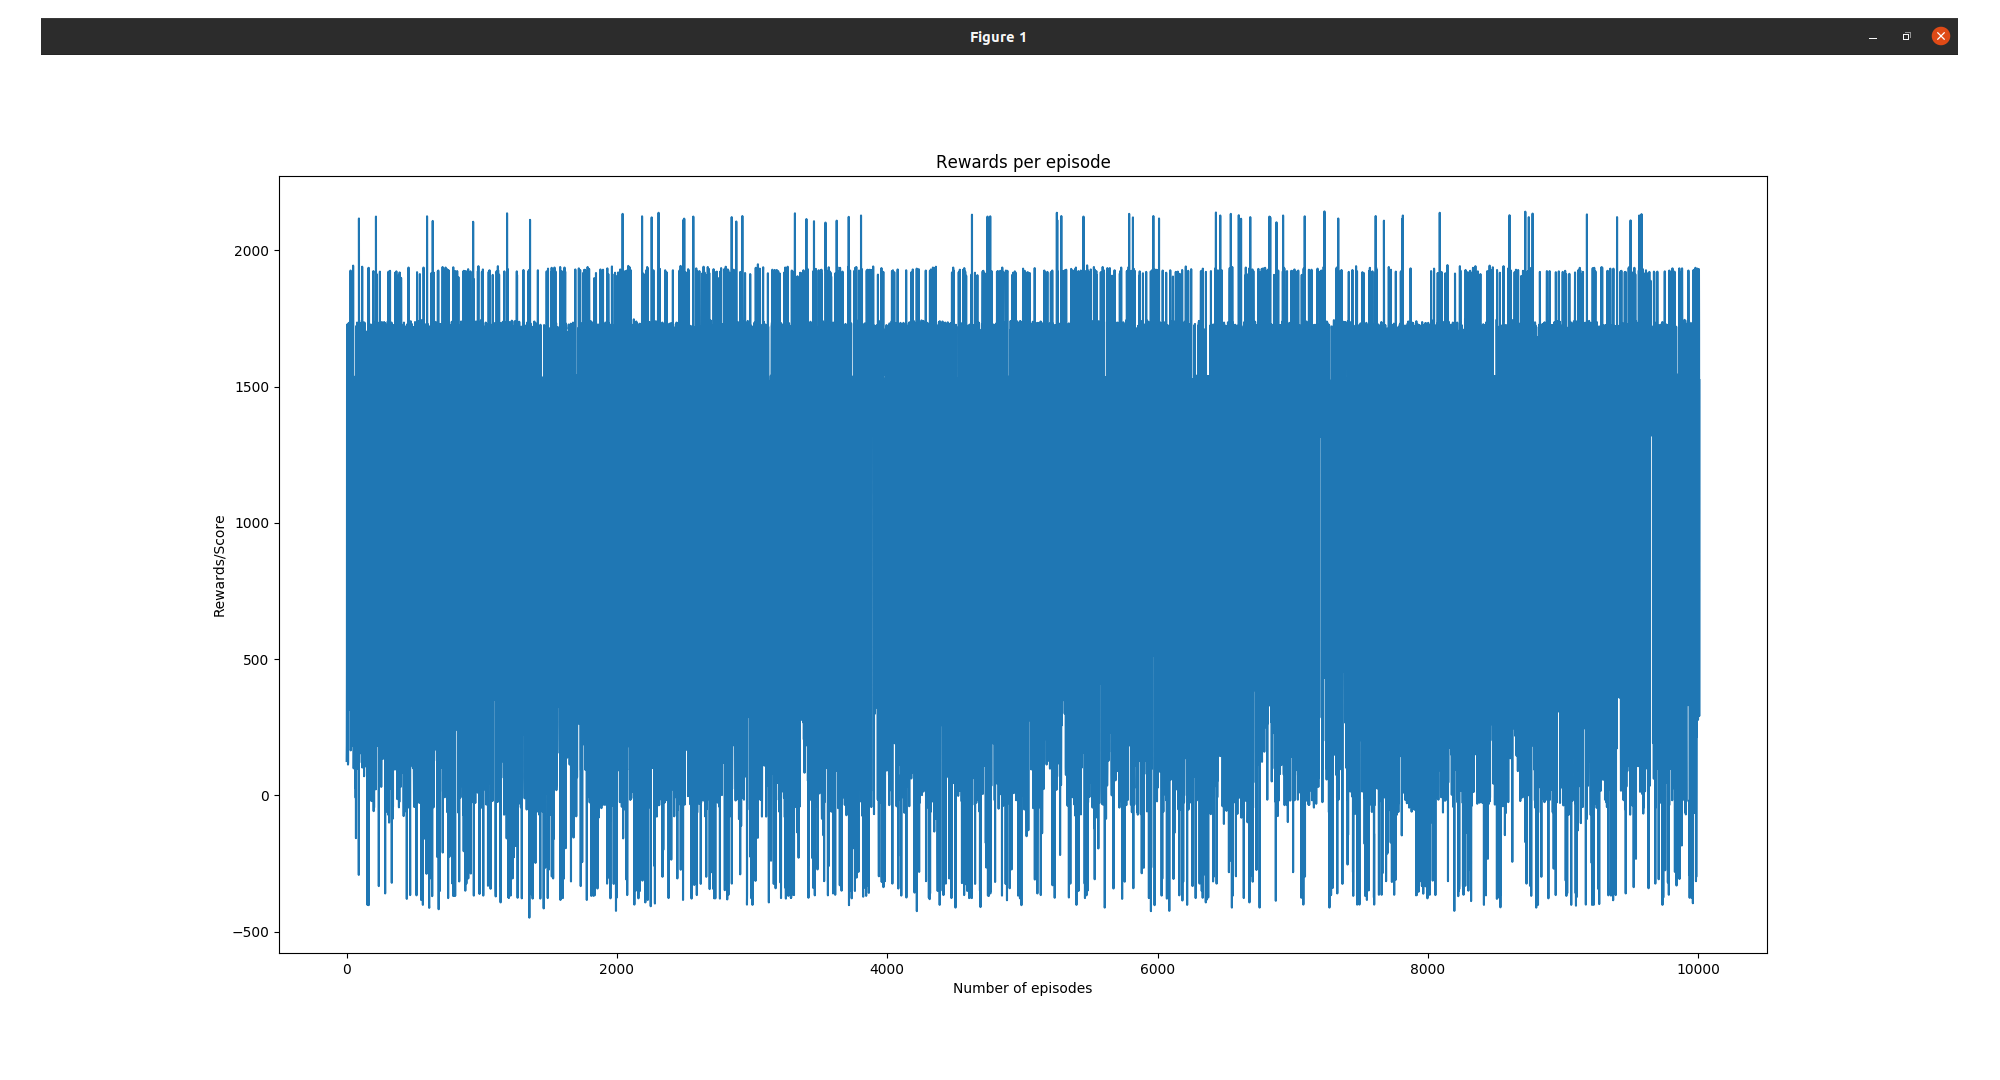

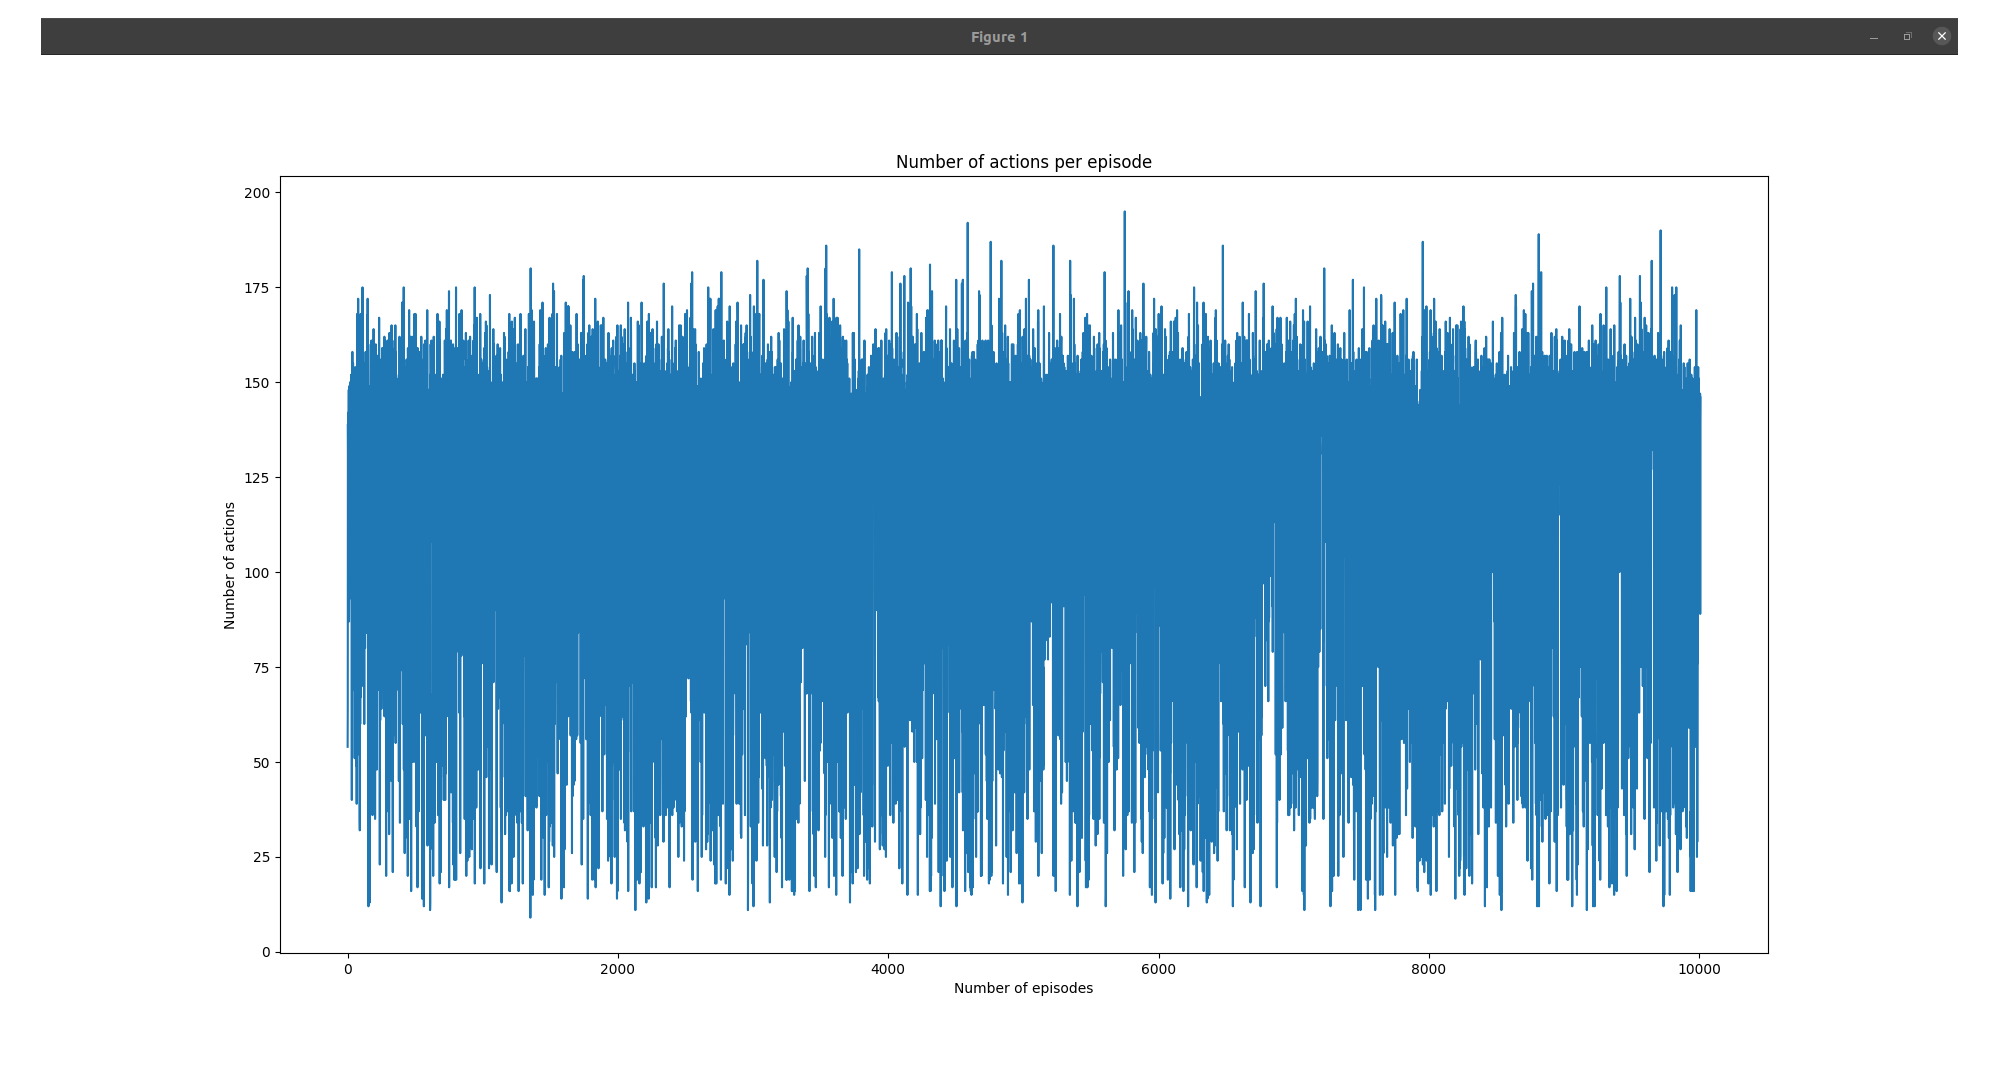

Já para as partidas de teste, obtivemos:

| Partida | Score | Nro de Ações | Resultado | 
|---------|-------|--------------|-----------|
|    1    | 1328  |     142      |    Win    |
|    2    |  657  |     133      |   Loss    |
|    3    | 1531  |     139      |    Win    |
|    4    | 1723  |     147      |    Win    |
|    5    | 1331  |     139      |    Win    |
|    6    | 1529  |     141      |    Win    |
|    7    | 1931  |     139      |    Win    |
|    8    | 1723  |     147      |    Win    |
|    9    |  291  |      89      |   Loss    |
|   10    | 1524  |     146      |    Win    |

Average Score: 1325.8

Win Rate:      8/10 (0.80)

### Resultados para o Original Layout

Já para o layout original, nosso conjunto de treino obteve os seguintes resultados:



E nas partidas de teste:

| Partida | Score | Nro de Ações | Resultado | 
|---------|-------|--------------|-----------|
|    1    | -191  |      51      |   Loss    |
|    2    | -189  |      49      |   Loss    |
|    3    |  985  |      65      |    Win    |
|    4    |  988  |      62      |    Win    |
|    5    |  963  |      87      |    Win    |
|    6    |  -43  |      83      |   Loss    |
|    7    |  979  |      71      |    Win    |
|    8    |  972  |      78      |    Win    |
|    9    |  989  |      61      |    Win    |

Average Score: 2232.7

Win Rate:      7/10 (0.70)

## Discussão dos Resultados

Nas diversas execuções que rodamos, notamos que a partir de um determinado número de episódios, os resultados finais permanecem inalterados, sendo que sempre obtemos um número de vitórias parecido: por volta dos 70% das execuções. 

Isso se dá principalmente devido a duas escolhas que fizemos: o alto valor de *gamma*, o baixo valor de *alpha* e a relação do *score* do jogo com a recompensa.

Por o valor de gamma ser próximo a 1, o agente valoriza as recompensas de forma mais igualitária, o que afeta o aprendizado. Para um aprendizado "melhor", poderíamos ter utilizado um valor de gamma menor. 

De forma análoga, como não alteramos o valor da recompensa com o passar dos episódios, e considerando que a maior recompensa é vencer o jogo, nosso agente estabiliza a partir de um número de episódios e não atualiza seu aprendizado.

A variação de score e número de ações se deu muito em relação aos layouts testados. Notamos ainda, que o número de vitórias foi semelhante entre os layouts, sendo 70% no small, 80% no medium e XY% no original.

### Divisão do trabalho

> Giulia teve como foco a Parte 1

> Muriel teve como foco a Parte 2

Mas ambos dedicaram-se igualmente nas duas partes, ficando responsáveis por revisar o trabalho do colega e contribuir na implementação e escrita do relatório.